<a href="https://colab.research.google.com/github/ntalme/Proyecto-Aprendizaje-de-Maquina/blob/main/CodigoProyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CARGAR ARCHIIVO**

In [1]:
# Inicializamos listas para guardar los datos
corpus = []       # Diagnósticos y procedimientos
target = []       # GRD
edad = []         # Edad del paciente
sexo = []         # Sexo (0: Hombre, 1: Mujer)

# Abrimos el archivo CSV
archivo = open("dataset_elpino.csv", encoding="utf-8")

# Leemos la primera línea (encabezados de columna)
header = archivo.readline().strip().split(";")

In [2]:
# Limpiamos los nombres de columnas
features = []
for col in header:
    col = col.split("-")[0].strip()  # Se elimina todo lo que esté después de "-"
    if col.startswith("Diag") or col.startswith("Proc"):
        col = col.split(" ")
        col = col[0] + col[1]  # Se junta nombre ej: "Diag" + "01"  = "Diag01"
    features.append(col)

# Recorremos las filas
for linea in archivo:
    row = []
    linea = linea.strip().split(";")

    for i in range(len(linea)):
        col = linea[i].split("-")[0].strip()

        if i == 67:  # Columna del GRD
            target.append(col)
        elif i == 66:  # Sexo (lo pasamos a binario)
            sexo.append(1 if col == "Mujer" else 0)
        elif i == 65:  # Edad
            edad.append(int(col))
        else:
            row.append(col)  # Diags y procs van a la lista corpus

    corpus.append(row)

# Cerramos el archivo
archivo.close()

## **DATOS LIMPIOS**

In [3]:
#Libreria
import pandas as pd

# Creamos el DataFrame con los datos procesados
df = pd.DataFrame(corpus, columns=features[:-3])  # Sin edad, sexo, GRD
df["Edad"] = edad
df["Sexo"] = sexo
df["GRD"] = target

# Revisamos las primeras filas
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


## **INFORMACIÓN DE LOS DATOS**

In [4]:
# Para ver la información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

In [5]:
# Ver la cantidad total de valores nulos que hay en los datos
df.isnull().sum().sum()

np.int64(0)

In [8]:
# Ver la cantidad total de celdas vacias
(df == '').sum().sum()

np.int64(649545)

### **BLOXPLOT**

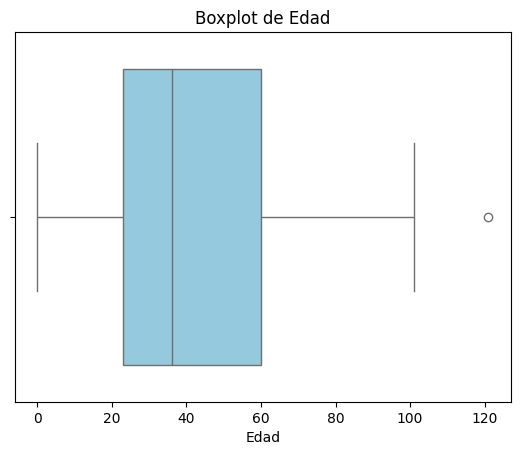

In [53]:
# Librerias
import matplotlib.pyplot as plt

# Grafico Bloxplot
sns.boxplot(data=df, x="Edad", color="skyblue")
plt.title("Boxplot de Edad")
plt.show()


### **DISTRIBUCIÓN DE LA EDAD**

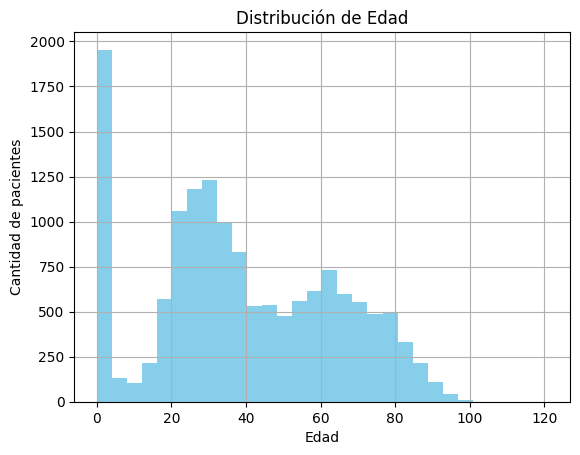

In [46]:
# Histograma para ver la distribución completa de las edades
df["Edad"].hist(bins=30, color="skyblue", edgecolor='none')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.show()

### **CANTIDAD DE HOMBRES Y MUJERES**

In [23]:
# Cantidad de hombres (0) y mujeres (0)
df["Sexo"].value_counts()

,count
Sexo,
1,9617
0,4944


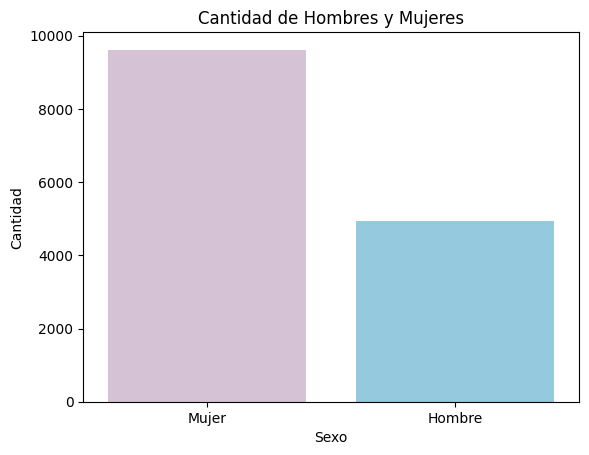

In [57]:
# Librerias
import seaborn as sns
import matplotlib.pyplot as plt

# Preparamos los datos
df_sexo = df["Sexo"].map({0: "Hombre", 1: "Mujer"}).value_counts().reset_index()
df_sexo.columns = ["Sexo", "Cantidad"]

# Gráfico
sns.barplot(data=df_sexo, x="Sexo", y="Cantidad", hue="Sexo", palette=["thistle", "skyblue"], legend=False)
plt.title("Cantidad de Hombres y Mujeres")
plt.ylabel("Cantidad")
plt.xlabel("Sexo")
plt.show()

### **CANTIDAD GRD**

In [34]:
# Calcular cuántos GRD distintos existen en el dataset
df["GRD"].nunique()

526

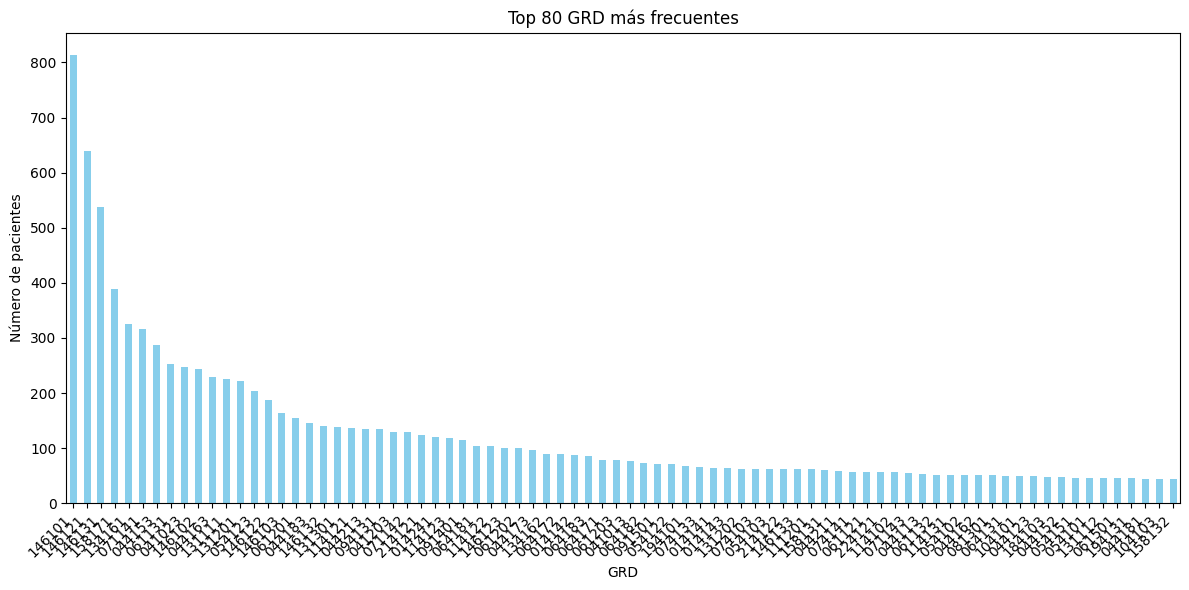

In [63]:
# Ver los GRD más frecuentes
grd = df["GRD"].value_counts().sort_values(ascending=False).head(80)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
grd.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title("Top 80 GRD más frecuentes")
plt.xlabel("GRD")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

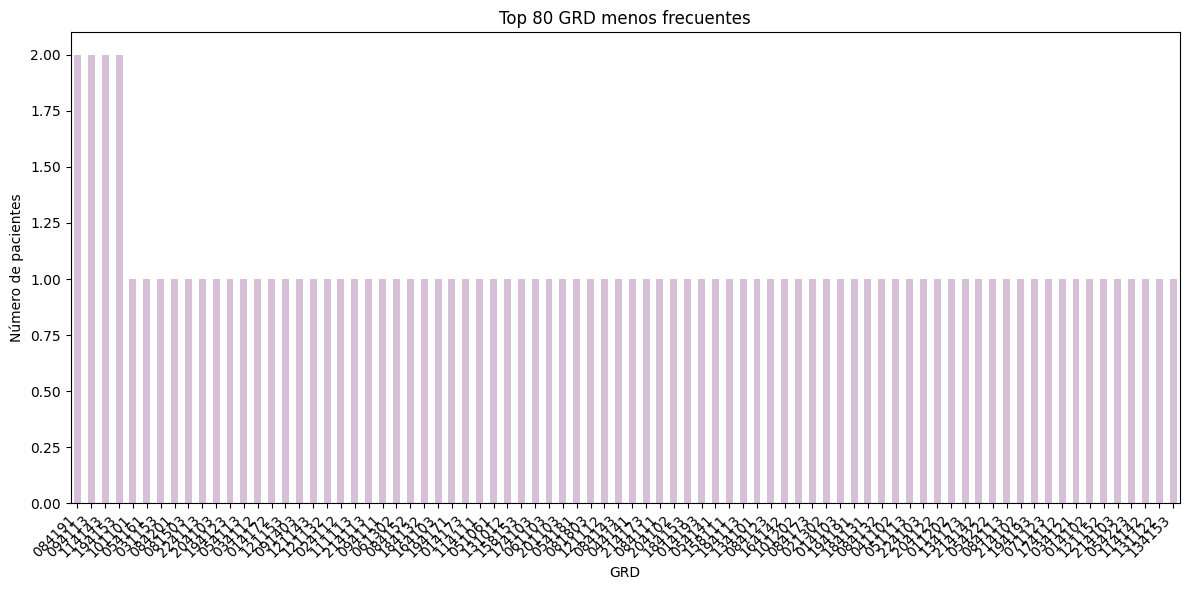

In [66]:
# Ver los GRD menos frecuentes
grd= df["GRD"].value_counts().sort_values(ascending=False).tail(80)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
grd.plot(kind='bar', color='thistle')

# Etiquetas y título
plt.title("Top 80 GRD menos frecuentes")
plt.xlabel("GRD")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()